## Author- Ilan Valencius
## Date - September 10, 2021

# Part 1: Univariate Linear Regression with Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import csv
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression

## Define training parameters

In [2]:
eta = 0.1
iterations = 40

## Define function to return gradient

In [3]:
def gradient(W, xs, ys):
    w0 = W[0]
    w1 = W[1]
    N = len(xs)
    
    # Derivatives
    wrtw0 = lambda x,y : -2*(y-w0-w1*x)
    wrtw1 = lambda x,y : -2*x*(y-w0-w1*x)
    
    # Variables to hold sums
    sum_w0 = 0
    sum_w1 = 0
    
    # Iterate over list and perform summation
    for (xn, yn) in zip(xs, ys):
        sum_w0 += wrtw0(xn, yn)
        sum_w1 += wrtw1(xn, yn)
        
    # Divide by N to get final answer and store in tuple
    grad = (1/N*sum_w0, 1/N*sum_w1)
    
    return grad

## Import Csv File

In [4]:
xs = []
ys = []
with open('unilinear.csv', newline='') as file:
    csv_in = csv.reader(file)
    for row in csv_in:
        xs.append(float(row[0]))
        ys.append(float(row[1]))

## Implement function to run algorithms

In [5]:
W = [0,0]
for _ in range(iterations):
    (w0, w1) = gradient(W, xs, ys)
    W[0] = W[0] - eta*w0
    W[1] = W[1] - eta*w1

## Plot results

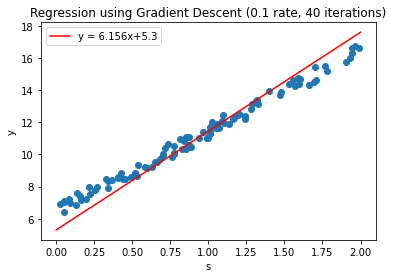

In [6]:
# Create data for plotting line
eq_x = np.linspace(0.0, 2.0, 100)
eq_y = W[0]*eq_x+W[1]
w0_str = str(round(W[0],3))
w1_str = str(round(W[1], 3))
eq_name = 'y = %sx+%s'% (w0_str, w1_str)
# Plot training data
plt.scatter(xs, ys)
plt.plot(eq_x, eq_y, 'r', label=eq_name)
plt.xlabel('s')
plt.ylabel('y')
plt.title('Regression using Gradient Descent (%s rate, %s iterations)'%(str(eta), str(iterations)))
plt.legend(loc='best')
# Display plots:
plt.show()

## Compute exact closed form solution

In [7]:
# (XtX)^-1XtY
x_arr = np.array(xs)
y_arr = np.array(ys)

# Create x_bar
ones = np.ones(100)
x_bar = np.stack((ones, x_arr), axis=1)

Xt = np.transpose(x_bar)
XtX = np.matmul(Xt,x_bar)

pseudo_inverse = np.linalg.inv(XtX)

XtY = np.dot(Xt, y_arr)

soln = np.dot(pseudo_inverse, XtY)

print("Weights obtained via closed form solution: %f | %f"%(soln[0], soln[1]))
print("Weights obtained via gradient descent: %f | %f"%(W[0], W[1]))


Weights obtained via closed form solution: 6.454787 | 5.021290
Weights obtained via gradient descent: 6.155614 | 5.300225


## Perform gradient descent for different learning reates

In [8]:
etas = [0.0001, 0.001, 0.01, 0.1]
Ws = [[0,0], [0,0], [0,0], [0,0]]
for i in range(len(etas)):
    for _ in range(iterations):
        eta_x = etas[i]
        (w0, w1) = gradient(Ws[i], xs, ys)
        Ws[i][0] = Ws[i][0] - eta_x*w0
        Ws[i][1] = Ws[i][1] - eta_x*w1

## Plot results of Learning Rates

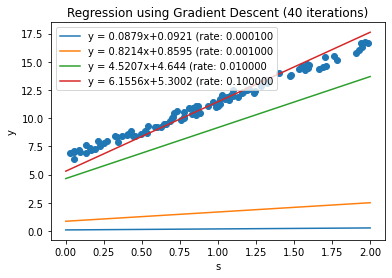

In [9]:
# Create data for plotting lines
eq_names = []
eq_x = np.linspace(0.0, 2.0, 100)
eq_ys = []
for i in range(len(Ws)):
    (w0, w1) = Ws[i]
    eq_ys.append(w0*eq_x+w1)
    w0_str = str(round(w0,4))
    w1_str = str(round(w1, 4))
    eq_names.append('y = %sx+%s (rate: %f'% (w0_str, w1_str,etas[i]))
# Plot training data
plt.scatter(xs, ys)
for name, y in zip(eq_names, eq_ys):
    plt.plot(eq_x, y, label=name)
plt.xlabel('s')
plt.ylabel('y')
plt.title('Regression using Gradient Descent (%s iterations)'%(str(iterations)))
plt.legend(loc='best')
# Display plots:
plt.show()

# Part 2: Logistic Regressions
## 2.1 Logistic regression on two classes
Divide Datasets:

In [10]:
iris = datasets.load_iris()
# Cols are: [Sepal Length, Sepal Width, Petal Length, Petal Width]

# Select petal width
X = iris.data[:, 3]
Y = iris.target
# Make copy of iris.target array in order to prevent overwriting it
Y1 = np.copy(Y)

# Uncomment below to fix overwrite
# Y[0:49] = 0
# Y[50:99] = 1
# Y[100:149] = 2

# Labels [0, 1, 2] = Iris Setosa | Iris Versicolour | Iris Virginica
# Split into virginica and non-virginica
virginica = 0
non_virginica = 0
for i in range(len(X)):
    y = Y1[i]
    if y == 2:
        Y1[i] = 1
        virginica+=1
    else:
        Y1[i] = 0
        non_virginica+=1
print("Number of virginica: %d"%(virginica))
print("Number of non_virginica: %d"%(non_virginica))

Number of virginica: 50
Number of non_virginica: 100


Create linear regression

In [11]:
linear_reg = LinearRegression()
linear_reg.fit(X.reshape(-1,1), Y1.reshape(-1,1))
m = linear_reg.coef_[0]
b = linear_reg.intercept_[0]
print("Weights obtained via gradient descent: %f | %f"%(m, b))

Weights obtained via gradient descent: 0.477456 | -0.239296


Create logistic regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X.reshape(-1,1), Y1)
m2 = log_reg.coef_[0]
b2 = log_reg.intercept_[0]
print("Weights obtained via logistic regression: %f | %f"%(m2,b2))

Weights obtained via logistic regression: 4.333085 | -7.194708


Make plot to compare

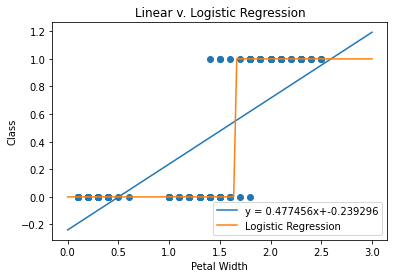

In [13]:
# Plot training data
plt.scatter(X, Y1)
# Plot linear
linear_name = 'y = %fx+%f'%(m,b)
X_new = np.linspace(0.0, 3.0, 100).reshape(-1,1)
plt.plot(X_new, linear_reg.predict(X_new), label=linear_name)
# Plot logistic
plt.plot(X_new, log_reg.predict(X_new), label='Logistic Regression')
plt.xlabel('Petal Width')
plt.ylabel('Class')
plt.title('Linear v. Logistic Regression')
plt.legend(loc='best')
# Display plots:
plt.show()

## 2.2 Multiclass Logistic Regression

In [14]:
# Extract petal width, petal length
length = iris.data[:,2]
width = iris.data[:,3]

len_arr = np.asarray(length)
wid_arr = np.asarray(width)

X2 = np.stack((len_arr, wid_arr), axis=1)
Y2 = iris.target

Train Model

In [15]:
multi_log_reg = LogisticRegression()
multi_log_reg.fit(X2, Y2)
m3 = multi_log_reg.coef_[0]
b3 = multi_log_reg.intercept_[0]
print("Weights obtained via logistic regression: %f and %f | %f"%(m3[0], m3[1],b3))

Weights obtained via logistic regression: -2.748661 and -1.168908 | 11.127680


Plot in 3D

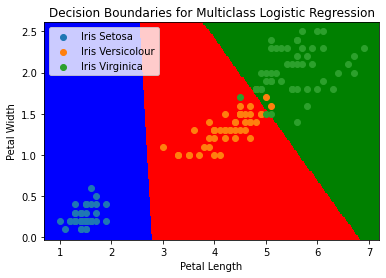

In [16]:
# Set up plotting parameters
iris_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
multi_cmap = ListedColormap(['b','r','g'])

# 50 of each class so go through and plot 50 at a time then change color
plt.scatter(X2[0:49,0], X2[0:49,1], cmap='r', label=iris_names[0], zorder=2)
plt.scatter(X2[50:99,0], X2[50:99,1], cmap='b', label=iris_names[1], zorder=2)
plt.scatter(X2[100:149,0], X2[100:149,1], cmap='g', label=iris_names[2], zorder=2)

# Plot logistic regression
# Create grid for classifications
stp_sz = 0.02
ax = plt.gca()
[xmin, xmax] = ax.get_xlim()
[ymin, ymax] = ax.get_ylim()
# Generate the axis associated to the first feature: 
x_axis = np.arange(xmin, xmax, stp_sz)
# Generate the axis associated to the 2nd feature: 
y_axis = np.arange(ymin, ymax, stp_sz)
# Generate a meshgrid (2D grid) from the 2 axis:
x_grid, y_grid = np.meshgrid(x_axis, y_axis)
# Vectorize the grids into column vectors:
x_grid_vectorized = x_grid.flatten()
x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
y_grid_vectorized = y_grid.flatten()
y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)
# Concatenate the vectorized grids
grid = np.concatenate((x_grid_vectorized, y_grid_vectorized),
                                axis=1)

# Predict Decision Boundaries
decision_boundaries = multi_log_reg.predict(grid)
decision_boundaries = decision_boundaries.reshape(x_grid.shape)
plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=multi_cmap, zorder=1, shading='auto')
        
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundaries for Multiclass Logistic Regression')
plt.legend(loc='best')
# Display plots:
plt.show()